In [185]:
import os 
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import math
from sklearn import metrics

warnings.filterwarnings("ignore")

In [187]:
filespath="H:\Warehouse\Data\DataUsedForPublication\Partial IsotopeProfile paper data used for publication\liverpool_CI\liver"
protiens=[ x for x in os.listdir(filespath) if (".Quant.csv") in x]

res=[]
for file in protiens:
    
    try:
        res= res +list(pd.read_csv(os.path.join(filespath,file), skiprows=1,index_col=False).Peptide)
    except:
        res= res +list(pd.read_csv(os.path.join(filespath,file), skiprows=3,index_col=False).Peptide)
    


KeyboardInterrupt



In [197]:
# pd.read_csv(os.path.join(filespath,file), skiprows=3,index_col=False)[[' M0',' M1',' M2',' M3',' M4',' M5']]

In [83]:
print(len(res))
temp_pep=(np.array(res))
temp_pep=np.unique([x.upper() for x in temp_pep])
temp_pep.shape

27307


(21619,)

7 52


<BarContainer object of 44 artists>

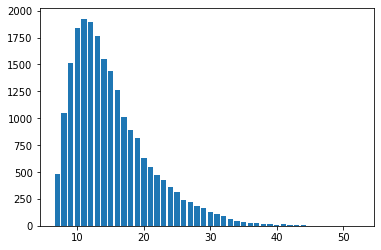

In [84]:
x,y=np.unique(np.array([len(x) for x in temp_pep]),return_counts=True)
print(min(x),max(x))
plt.bar(x,y)

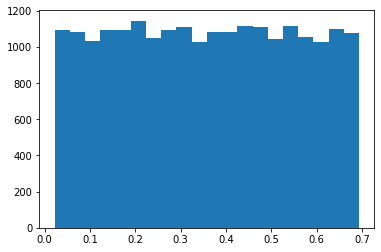

In [90]:
rate=[x for x in np.array(np.random.uniform(low = math.log(2)/31, high = math.log(2), size = temp_pep.shape[0] )).ravel()]#np.rint
count, bins, ignored = plt.hist(s, 20, density=False)

In [86]:
trueval=[4.0,1.62,1.89,3.95,0.32,2.06,2.88,1.0,0.6,0.54,1.12,1.89,2.59,3.95,3.43,2.61,0.2,0.56,0.08,0.42]
all_AAs=[x.upper() for x in
         ['a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'p','q', 'r', 's', 't', 'v', 'w', 'y']]

In [87]:
def compute_neh(seq):
    res=0
    for c in seq:
        res+=trueval[all_AAs.index(c)]
    return int(res)

In [88]:
pep_neh=[]
for pep in temp_pep:
    pep_neh.append(compute_neh(pep))
len(pep_neh)

21619

3 112


<BarContainer object of 97 artists>

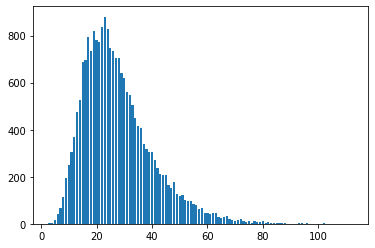

In [89]:
x,y=np.unique(np.array(pep_neh),return_counts=True)
print(min(x),max(x))
plt.bar(x,y)

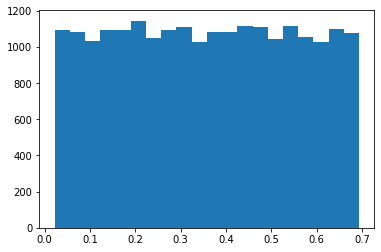

In [92]:
I0=[x for x in np.array(np.random.uniform(low = 0.15, high = 0.55, size = temp_pep.shape[0] )).ravel()]#np.rint
count, bins, ignored = plt.hist(s, 20, density=False)

In [95]:
def compute_ioasym(i0,neh):
    pw=0.05
    ph=1.5574E-4
    return i0*(1-pw/(1-ph))**neh

In [99]:
def compute_i0_t(t,k,neh,i0):
    io_asym=compute_ioasym(i0,neh)
    return  io_asym + (i0-io_asym)*(math.exp(-k*t))

0.9956130152099965 0.006148186427872429


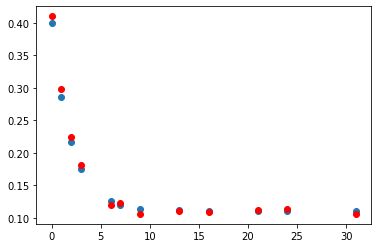

In [170]:
io_ts=[]
io_ns=[]
times=[0,1 ,2 ,3 ,6 ,7 ,9 ,13,16,21,24,31]
for i in times:
    io_ts.append(compute_i0_t(i,0.5,25,0.4))
    io_ns.append(io_ts[-1]+np.random.normal(0,0.005,1))
plt.scatter(times,io_ts)
plt.scatter(times,io_ns,c='r')
print(metrics.r2_score(io_ns,io_ts),(metrics.mean_squared_error(io_ns,io_ts))**0.5)

In [179]:
sim_res=[]
for i in range(len(temp_pep)):
    temp_res=[
    temp_pep[i],pep_neh[i],
    rate[i],
    I0[i]]
    
    io_ts=[]
    io_ns=[] 
    for i in times:
        io_ts.append(compute_i0_t(i,rate[i],pep_neh[i],I0[i]))
        io_ns.append(float(io_ts[-1]+np.random.normal(0,0.005,1)))
        
    temp_res+=[metrics.r2_score(io_ns,io_ts),(metrics.mean_squared_error(io_ns,io_ts))**0.5]
    
    temp_res+=io_ns+io_ts
    sim_res.append(temp_res)

In [180]:
df_sim_res=pd.DataFrame(sim_res)
df_sim_res.columns=["Pep",'NEH','k','I0','R2','RMSE']+ [f'T_i0_{t}' for t in times] +[f'N_i0_{t}' for t in times]

In [184]:
df_sim_res.to_csv("NEH_sim.csv",index=False)